<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Deep_Learning_Time_Series_Forecasting_using_Gluon_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install --upgrade mxnet-cu101==1.6.0.post0
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
import numpy as np

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [ ]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


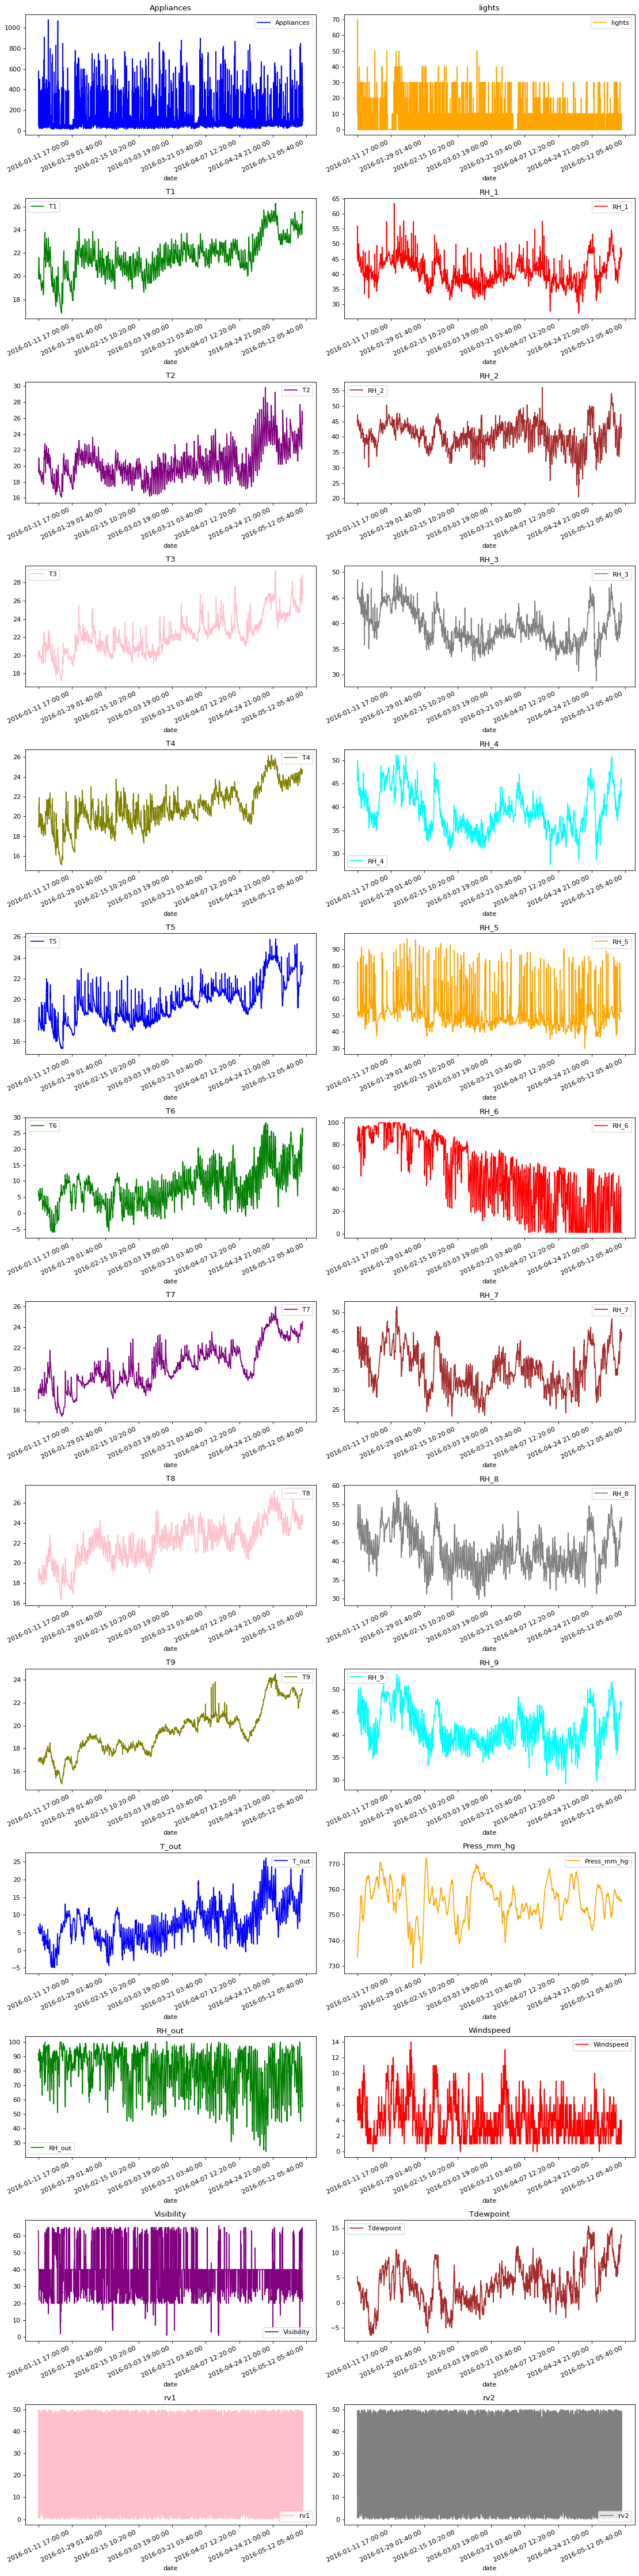

In [ ]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_key = "date"


def Visualize(data):
    time_data = data[date_key]
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

In [ ]:
df_input=df[['date','Appliances','T_out','Press_mm_hg', 'RH_out', 'Windspeed', 'Tdewpoint', 'Visibility']]

In [ ]:
df_input=df_input.set_index('date')

In [ ]:
train_time="2016-05-10 00:00:00"
prediction_length=144

In [ ]:
estimator = DeepAREstimator(freq="10min", 
                            context_length=720,
                            prediction_length=prediction_length,
                            num_layers=2,
                            num_cells=128,
                            cell_type='lstm',
                            trainer=Trainer(epochs=8))

In [ ]:
from gluonts.dataset.common import ListDataset

training_data = ListDataset(
    [{"start": df_input.index[0], "target": df_input.Appliances[:train_time]}],
    freq = "10min"
)

In [ ]:
predictor = estimator.train(training_data=training_data)

  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [03:44<00:00,  4.48s/it, epoch=8/8, avg_epoch_loss=4.38]


In [ ]:
test_data = ListDataset(
    [
        {"start": df_input.index[0], "target": df_input.Appliances[:"2016-05-11 00:00:00"]},
        {"start": df_input.index[0], "target": df_input.Appliances[:"2016-05-15 00:00:00"]}
    ],
    freq = "10min"
)

In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  
    predictor=predictor,  
    num_samples=100,  
)

In [ ]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [ ]:
forecast_entry = forecasts[0]

In [ ]:
forecast_entry

gluonts.model.forecast.SampleForecast(freq="10min", info=None, item_id=None, samples=numpy.array([[58.93122482299805, 52.23185348510742, 42.09988021850586, 50.65750503540039, 46.69582748413086, 59.177040100097656, 54.63758087158203, 55.265037536621094, 59.583160400390625, 48.76491928100586, 51.7444953918457, 61.29692077636719, 48.13619613647461, 42.569515228271484, 38.59914016723633, 50.654048919677734, 45.21949005126953, 53.38452911376953, 49.55562973022461, 68.81425476074219, 87.22625732421875, 68.55738067626953, 77.5820541381836, 61.79815673828125, 56.74604415893555, 62.89676284790039, 50.59994125366211, 37.3536262512207, 43.22455596923828, 42.745887756347656, 29.86236572265625, 31.621885299682617, 38.60819625854492, 48.107669830322266, 45.789329528808594, 53.308326721191406, 77.0769271850586, 93.66397094726562, 88.82333374023438, 69.75114440917969, 72.2064208984375, 59.506595611572266, 55.91469955444336, 75.46605682373047, 49.78861999511719, 57.92818832397461, 56.90822982788086, 67

In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = prediction_length
    prediction_intervals = (80.0, 95.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax) 
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

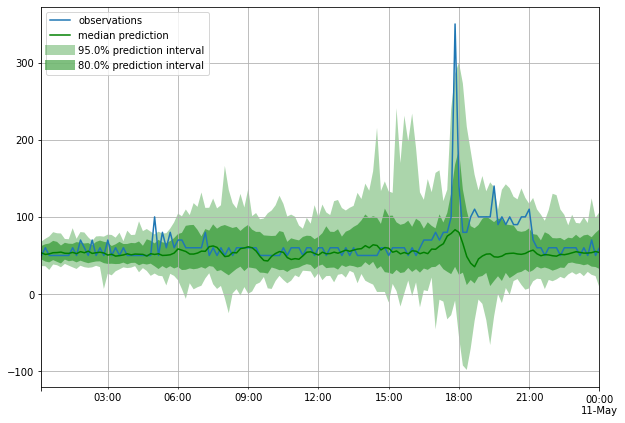

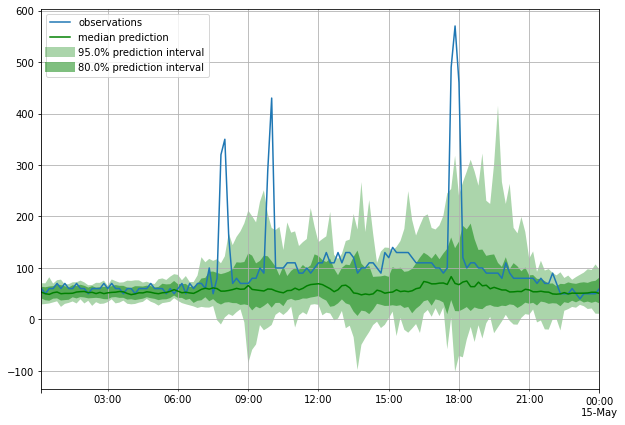

In [ ]:
plot_prob_forecasts(tss[0], forecasts[0])
plot_prob_forecasts(tss[1], forecasts[1])


In [ ]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data))

Running evaluation: 100%|██████████| 2/2 [00:00<00:00, 35.35it/s]WARNING:root:multiple 10 does not divide base seasonality 1.Falling back to seasonality 1



In [ ]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,833.467394,2138.870605,9510.0,66.041667,29.977297,0.495484,0.172321,0.203741,NaN,4.420684,939.076092,0.0,2138.870499,0.312500,1348.555281,0.861111
1,NaN,6927.223524,6271.780273,14350.0,99.652778,29.797792,1.461653,0.313007,0.408639,NaN,18.717300,1940.879913,0.0,6271.780293,0.104167,5259.779504,0.680556
